In [1]:
import sys
import os
import matplotlib.pyplot as plt
import torch
# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from models.unet.unet import UNet
from src.models.data_management.cnn_formes import CNNFormes
from src.data_processing.dataset_loader import CoastData
from src.models.metrics import Metrics

from src.models.data_management.data_loader import DataLoaderManager

import cv2

c:\Users\josep\.conda\envs\imagine\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
# Execute this cell to make sure 
# that external modules are reloaded
%load_ext autoreload
%autoreload 2

In [3]:
artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

num_classes = 3
metrics = {
    "train": Metrics(phase="train", num_classes=num_classes, average=None, use_margin=False),
    "validation": Metrics(phase="val", num_classes=num_classes, average=None, use_margin=False),
    "test": Metrics(phase="test", num_classes=num_classes, average=None, use_margin=False) # 'macro'
}

# Load the data to split it and save it to a dict
model = UNet(num_classes=3, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-04-08-09-46-31_unet/models/best_model.pth")))

# Normal:  2025-03-12-11-44-51_deeplab
# reflect: 2025-04-03-06-47-22_deeplab

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [3]:
for split in data:
    print(f"Split: {split}")
    for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
        pred = model.predict_patch(img_path, combination="max")
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = torch.from_numpy(mask).float() 
        metrics[split].update_metrics(pred, mask)


    metrics[split].compute()
    print(metrics[split].get_last_epoch_info())

Split: train


c:\Users\josep\.conda\envs\imagine\Lib\site-packages\torcheval\metrics\functional\classification\accuracy.py:275: UserWarning: The reduce argument of torch.scatter with Tensor src is deprecated and will be removed in a future PyTorch release. Use torch.scatter_reduce instead for more reduction options. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorAdvancedIndexing.cpp:234.)
  num_correct = mask.new_zeros(num_classes).scatter_(0, target, mask, reduce="add")


train metrics: 
	train_accuracy: tensor([0.9993, 0.9983, 0.9981])
	train_f1_score: tensor([0.9995, 0.9981, 0.9982])
	train_precision: tensor([0.9997, 0.9979, 0.9982])
	train_recall: tensor([0.9993, 0.9983, 0.9981])
	train_confusion_matrix: 
		0.9993 0.0004 0.0003
		0.0001 0.9983 0.0016
		0.0001 0.0018 0.9981

Split: validation
val metrics: 
	val_accuracy: tensor([0.9992, 0.9854, 0.9804])
	val_f1_score: tensor([0.9994, 0.9830, 0.9826])
	val_precision: tensor([0.9995, 0.9807, 0.9849])
	val_recall: tensor([0.9992, 0.9854, 0.9804])
	val_confusion_matrix: 
		0.9992 0.0004 0.0003
		0.0002 0.9854 0.0144
		0.0001 0.0195 0.9804

Split: test
test metrics: 
	test_accuracy: tensor([0.9993, 0.9846, 0.9698])
	test_f1_score: tensor([0.9993, 0.9778, 0.9768])
	test_precision: tensor([0.9994, 0.9711, 0.9839])
	test_recall: tensor([0.9993, 0.9846, 0.9698])
	test_confusion_matrix: 
		0.9993 0.0004 0.0002
		0.0002 0.9846 0.0153
		0.0003 0.0299 0.9698



In [5]:
artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

num_classes = 3
metrics = {
    "train": Metrics(phase="train", num_classes=num_classes, average="micro", use_margin=False),
    "validation": Metrics(phase="val", num_classes=num_classes, average="micro", use_margin=False),
    "test": Metrics(phase="test", num_classes=num_classes, average="micro", use_margin=False) # 'macro'
}

# Load the data to split it and save it to a dict
model = UNet(num_classes=3, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-04-08-09-46-31_unet/models/best_model.pth")))

# Normal:  2025-03-12-11-44-51_deeplab
# reflect: 2025-04-03-06-47-22_deeplab

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

split = "test"
print(f"Split: {split}")
for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
    pred = model.predict_patch(img_path, combination="max")
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = torch.from_numpy(mask).float() 
    metrics[split].update_metrics(pred, mask)


metrics[split].compute()
print(metrics[split].get_last_epoch_info())

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Split: test
test metrics: 
	test_accuracy: 0.9832266569137573
	test_f1_score: 0.9832266569137573
	test_precision: 0.9832262396812439
	test_recall: 0.9832266569137573
	test_confusion_matrix: 
		0.9993 0.0004 0.0002
		0.0002 0.9846 0.0153
		0.0003 0.0299 0.9698



c:\Users\josep\Documents\SOCIB\Shoreline-extraction\data\processed\images\1625428979.Sun.Jul.04_21_02_59.CET.2021.cadiz.image.jpg


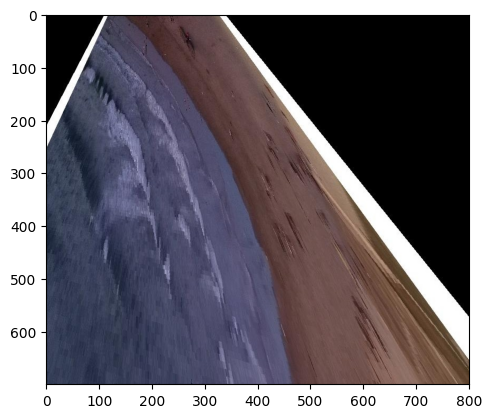

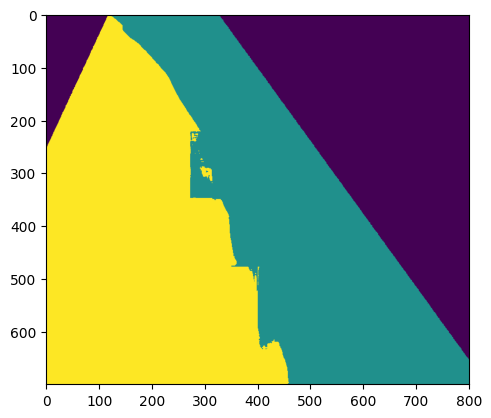

In [4]:
img_path = sorted(data['test']['images'])[85]
print(img_path)

pred = model.predict_patch(img_path, combination="max", patch_size = 256, stride = 128)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

plt.imshow(pred)
plt.show()

# Save the results to an output folder

In [4]:
# Data with 4 classes, to be able to compute the shoreline distance

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_4_classes"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [14]:
# Create a folders system to save the results
# SCLabels_prediction_by_set_unet
#   - images
#       - train
#       - validation
#       - test
#   - masks
#       - train
#       - validation
#       - test
#   - predicted_mask
#       - train
#       - validation
#       - test

# Create the folders
subfolders = ["images", "masks", "predicted_mask"]
subset = ["train", "validation", "test"]

path = os.path.abspath(os.path.join(os.getcwd(), "../../data/SCLabels_prediction_by_set_unet_2025"))

os.makedirs(path, exist_ok=True)
for subfolder in subfolders:
    for s in subset:
        os.makedirs(os.path.join(path, subfolder, s), exist_ok=True)

In [ ]:
for split in data:
    print(f"Split: {split}")
    for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
        pred = model.predict_patch(img_path, combination="max")
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Save the images
        img = cv2.imread(img_path)
        img_name = os.path.basename(img_path)
        mask_name = os.path.basename(mask_path)

        cv2.imwrite(os.path.join(path, "images", split, img_name), img)
        cv2.imwrite(os.path.join(path, "masks", split, mask_name), mask)
        cv2.imwrite(os.path.join(path, "predicted_mask", split, mask_name), pred.cpu().numpy())

# Tests

In [5]:
artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

# num_classes = 3
# metrics = {
#     "train": Metrics(phase="train", num_classes=num_classes, average="micro", use_margin=False),
#     "validation": Metrics(phase="val", num_classes=num_classes, average="micro", use_margin=False),
#     "test": Metrics(phase="test", num_classes=num_classes, average="micro", use_margin=False) # 'macro'
# }

# Load the data to split it and save it to a dict
model = UNet(num_classes=3, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-04-08-09-46-31_unet/models/best_model.pth")))

# Normal:  2025-03-12-11-44-51_deeplab
# reflect: 2025-04-03-06-47-22_deeplab

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)


CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [6]:
import numpy as np

In [55]:
split = "test"

index = 3
img_path = data[split]["images"][index]
mask_path = data[split]["masks"][index]

pred = model.predict_patch_prob(img_path, combination="max")

Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])
Shoreline shape: torch.Size([1, 256, 256])


[0. 1.]


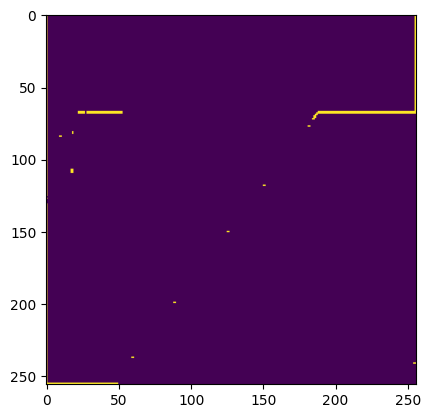

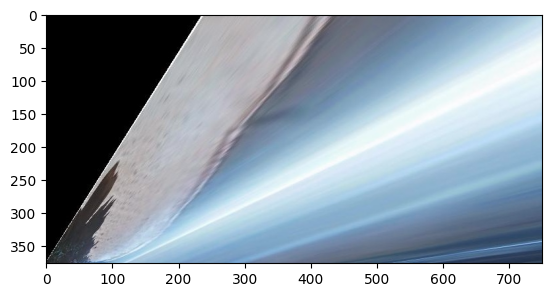

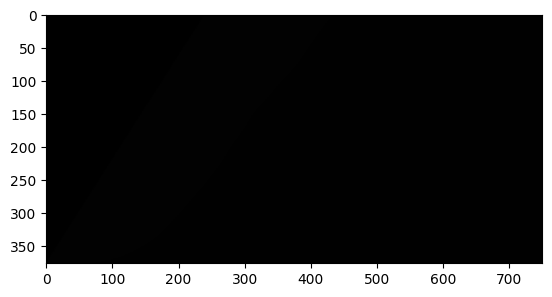

In [59]:
i = 2
print(np.unique(pred[i].cpu().numpy()))
plt.imshow(pred[i].squeeze().cpu())
plt.show()

plt.imshow(cv2.imread(img_path))
plt.show()

plt.imshow(cv2.imread(mask_path))
plt.show()